In [1]:
import sklearn
import pandas as pd
import numpy as np
#print( 'The scikit learn version is {}.'.format(sklearn.__version__))

In [2]:
df = pd.read_csv('Treasury Squeeze raw score data.csv')

In [3]:
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [4]:
df.shape

(900, 12)

In [5]:
# Dropping extra columns
df = df.drop(['rowindex', 'contract'], axis=1)

# Replacing String with int
df['squeeze'].replace({False: 0, True: 1}, inplace=True)

# Converting int to bool
df['squeeze'].astype(bool)

0       True
1      False
2      False
3       True
4      False
       ...  
895    False
896    False
897     True
898     True
899     True
Name: squeeze, Length: 900, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_crossing    900 non-null    float64
 1   price_distortion  900 non-null    float64
 2   roll_start        900 non-null    float64
 3   roll_heart        900 non-null    float64
 4   near_minus_next   900 non-null    float64
 5   ctd_last_first    900 non-null    float64
 6   ctd1_percent      900 non-null    float64
 7   delivery_cost     900 non-null    float64
 8   delivery_ratio    900 non-null    float64
 9   squeeze           900 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 70.4 KB


In [7]:
# Check the count of squeezes
df['squeeze'].value_counts()

0    516
1    384
Name: squeeze, dtype: int64

We observe that there are a good amount of data for both squeeze and not a squeeze.

In [8]:
# Creating y which containts target variable
y_temp = df['squeeze'].values
y = y_temp

# Create x which contains all the training variables
x_temp = df.drop(['squeeze'], axis=1).values

# We can uncomment the different datapairs below try building a classification model
x = x_temp[:, [0,1]] # 'price_crossing', 'price_distortion'
# x = x_temp[:, [1,5]] # 'price_distortion', 'ctd_last_first'
# x = x[:, [7,8]] # 'delivery_cost', 'delivery_ratio'
# x = x[:, [4,6]] # 'near_minus_next', 'ctd1_person'

# x_train = x[600:, :]
# x_test = x[600:, :]

# y_train = y[600:]
# y_test = y[600:]

In [9]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Test set will be 25% taken randomly. stratify maintains ratio
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=33, stratify=y)

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.5911111111111111


In [10]:
import sklearn.metrics as metrics

train_accuracies = {}
test_accuracies = {}

# We run knn classifier for a range of k values
k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    
#     train_accuracies[k_range] = knn.score(x_train,y_train)
#     test_accuracies[k_range] = knn.score(x_test,y_test)

In [11]:
scores

[0.5288888888888889,
 0.6044444444444445,
 0.5866666666666667,
 0.5777777777777777,
 0.5644444444444444,
 0.5911111111111111,
 0.56,
 0.5688888888888889,
 0.5733333333333334,
 0.5822222222222222,
 0.5822222222222222,
 0.5733333333333334,
 0.5777777777777777,
 0.6044444444444445,
 0.5733333333333334,
 0.5733333333333334,
 0.5866666666666667,
 0.5777777777777777,
 0.5777777777777777,
 0.5777777777777777,
 0.5777777777777777,
 0.5688888888888889,
 0.5866666666666667,
 0.5777777777777777,
 0.5733333333333334]

We can observe a high accuracy when k is small.

I tried to plot the classifier, but I was getting an error. Will add the plot in the next version.

Text(0, 0.5, 'Price Distortion')

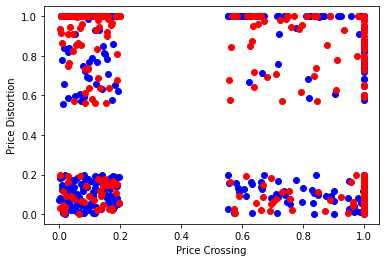

In [12]:
import matplotlib.pyplot as plt

colors = ['blue', 'red']

#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
        xs = x_train[:, 0][y_train == i]
        ys = x_train[:, 1][y_train == i]
        plt.scatter(xs, ys, c=colors[i])
    

plt.xlabel('Price Crossing')
plt.ylabel('Price Distortion')

I tried to plot the classifier


Below, we try out a decision tree classifier

In [13]:
import numpy as np
import matplotlib
from matplotlib import pyplot

# We define impurity functions
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entorpy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

In [14]:
from sklearn.tree import DecisionTreeClassifier

# We can change the max_depth variable and see how it affects the accuracy
tree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)

tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

# x_combined = np.vstack((x_train, x_test))
# y_combined = np.vstack((y_train, y_test))

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6044444444444445


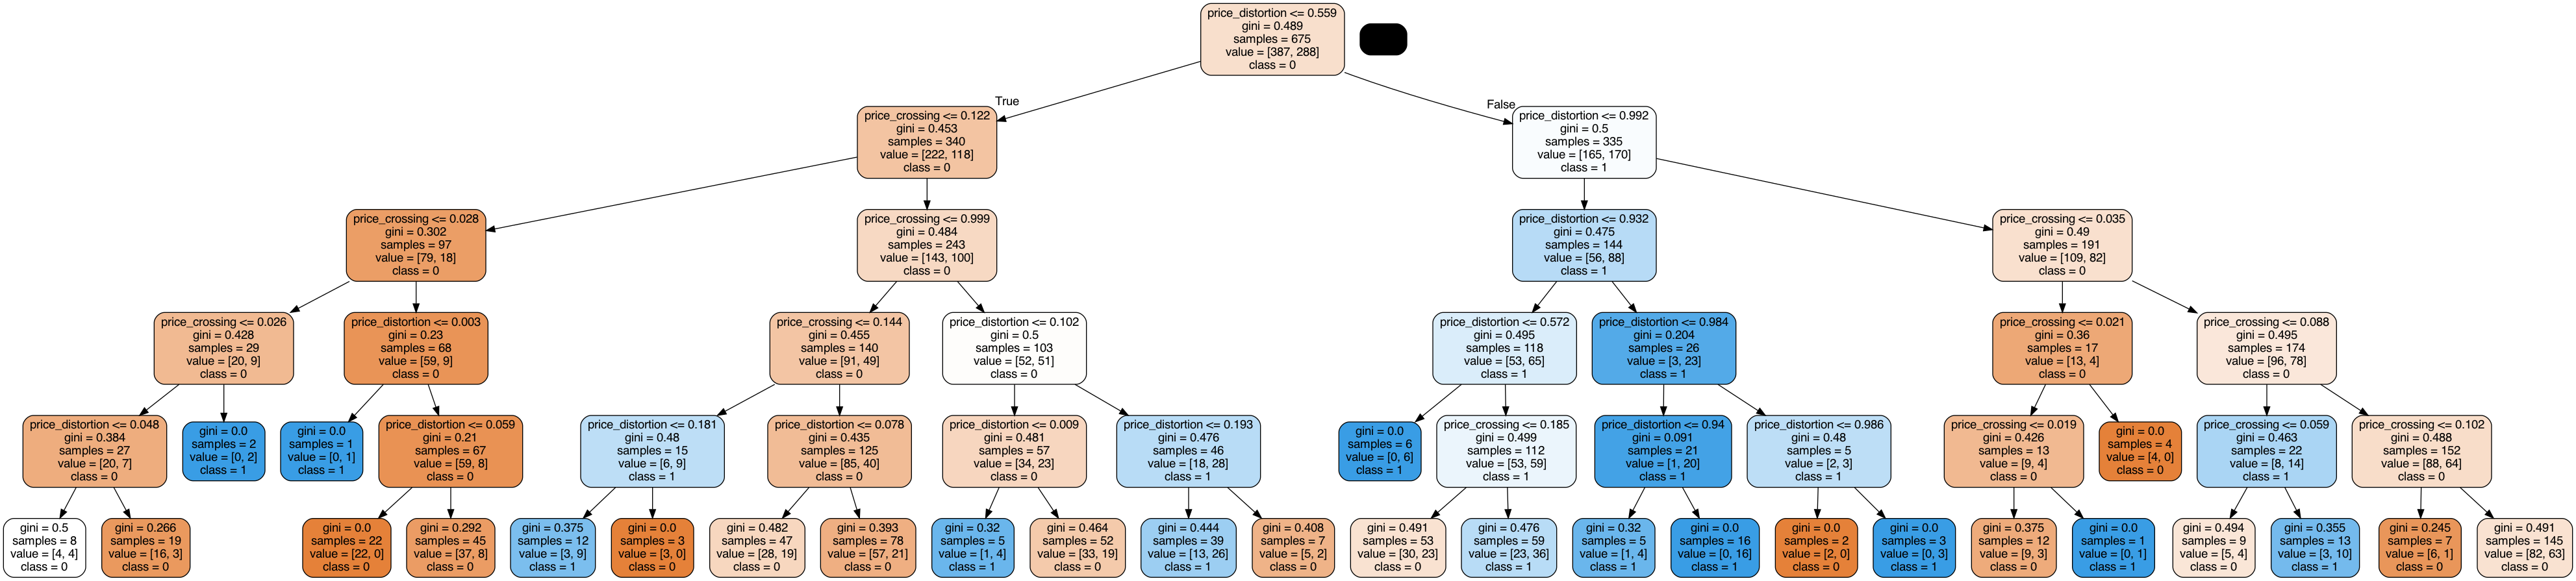

In [16]:
# We print the decision tree

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(tree, out_file=None,
                filled=True, rounded=True,
                feature_names = ['price_crossing', 'price_distortion'],class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data)  
# graph.write_png('tree.png')
Image(graph.create_png())
# graph

In [17]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
